<a href="https://colab.research.google.com/github/gracegloger/bme3053c/blob/main/lessons/unsupervised_homework_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploring Hidden Layer Representations in Neural Networks with PCA and t-SNE


In this assignment, we will investigate how neural networks represent information in their hidden layers, comparing networks with trained versus untrained parameters. Using unsupervised learning techniques, specifically Principal Component Analysis (PCA) and t-SNE, we will visualize the hidden layer outputs in two dimensions.

Through these visualizations, you will explore and analyze two key aspects:
1. The distinctions between PCA and t-SNE as dimensionality reduction techniques.
2. The differences in the learned representations of hidden layers before and after training.

This analysis will help you gain insights into how training affects feature learning and dimensionality reduction. We will use the MNIST dataset for this task, but similar results can be observed with other datasets.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import plotly.express as px
    from sklearn.manifold import TSNE
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys

    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


##### We will use the MNIST dataset to compare representations in the hidden layers of a neural network. Follow these steps to load, scale, and split the dataset.


In [2]:
# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# Convert X and y to pandas DataFrames
X = pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
y = pd.Series(y, name='label')

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)


##### The cell below defines a function that creates an MLP (Multi-Layer Perceptron) classifier with preset parameters.

##### **You should use the `get_mlp_classifier()` function below to create the MLP classifiers for this homework.**

The classifier is configured with:
- One hidden layer of 100 neurons
- ReLU activation function
- Adam optimizer
- 20 maximum iterations
- Random state of 42 for reproducibility


In [3]:
def get_mlp_classifier(max_iter=20):
    return MLPClassifier(
        hidden_layer_sizes=(200,),  # One hidden layer with 100 neurons
        activation='relu',
        solver='adam',
        max_iter=max_iter,
        random_state=42,
        verbose=False
)


`get_untrained_hidden_layer_outputs` creates a new classifier and then computes the outputs of the hidden layer with the test set as an input.

The outputs of a neural network hidden layer are intermediate representations of the input data
after being transformed by the layer's weights and activation function. These outputs capture
learned features and patterns from the input data.

The resulting values represent abstract features that the network uses for its final prediction



In [4]:
def get_untrained_hidden_layer_outputs():
    mlp_classifier= get_mlp_classifier(1)
    single_X=np.random.uniform(0, 1, size=(1, 784))
    single_y=[1]
    single_X = X_train[0:1]  # Take first sample
    single_y = y_train[0:1]  # Take first label

    mlp_classifier.partial_fit(single_X, single_y, classes=np.unique(y_train))



    intermediate_output = X_test @ mlp_classifier.coefs_[0]
    intermediate_output = np.maximum(0, intermediate_output)
    return intermediate_output


`get_trained_hidden_layer_outputs` creates a new classifier, trains it on the full training set, and then computes the outputs of the hidden layer with the test set as input.
Similar to the untrained version, this function:
1. Creates an MLPClassifier with default parameters (20 max iterations)
2. Trains the classifier on X_train and y_train using fit()
3. Computes the hidden layer outputs by:
   - Multiplying input data (X_test) with the first layer weights (coefs_[0])
   - Applying ReLU activation (max(0,x)) to the result
The key difference is that this classifier is fully trained, so its hidden layer representations
should be more meaningful for distinguishing between different digit classes.


In [5]:
def get_trained_hidden_layer_outputs():
    mlp_classifier= get_mlp_classifier()
    # mlp_classifier.fit(single_X, )
    mlp_classifier.fit(X_train, y_train)

    intermediate_output = X_test @ mlp_classifier.coefs_[0]
    intermediate_output = np.maximum(0, intermediate_output)
    return intermediate_output

### **Part 1A**
##### Extract the outputs from the hidden layer of an *untrained* MLPClassifier and apply t-SNE to the hidden layer outputs to represent the data in 2D

1. get the outputs from `get_untrained_hidden_layer_outputs()` and apply t-SNE to visualize the results
2. Create a scatter plot of the 2D t-SNE results
3. Color code the points based on their class labels (`y_test.astype(int)`)
4. Add a colorbar to identify different classes




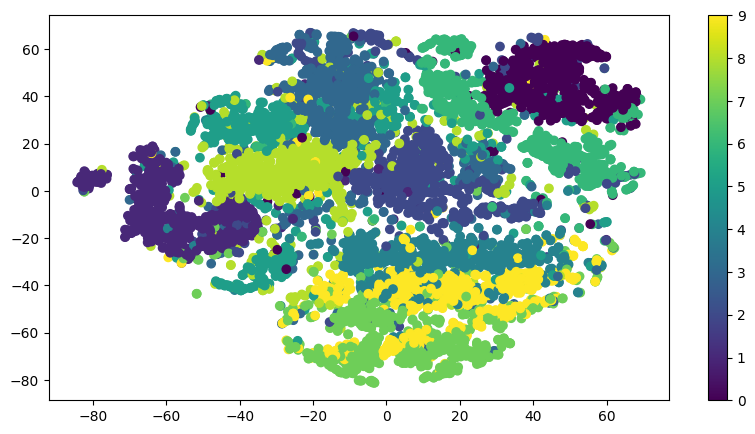

In [6]:
#Provide your code below
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get the hidden layer outputs
hidden_layer_outputs = get_untrained_hidden_layer_outputs()

# Apply t-SNE to visualize the results
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(hidden_layer_outputs)

# Create a scatter plot of the 2D t-SNE results
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=y_test.astype(int), cmap='viridis')
plt.colorbar()
plt.show()


### **Part 1B**
##### Now, extract the outputs from the hidden layer of an *untrained* MLPClassifier and apply PCA instead of t-SNE

1. get the outputs from `get_untrained_hidden_layer_outputs()` and apply PCA to visualize the results
2. Create a scatter plot of the 2D PCA results
3. Color code the points based on their class labels (`y_test.astype(int)`)
4. Add a colorbar to identify different classes




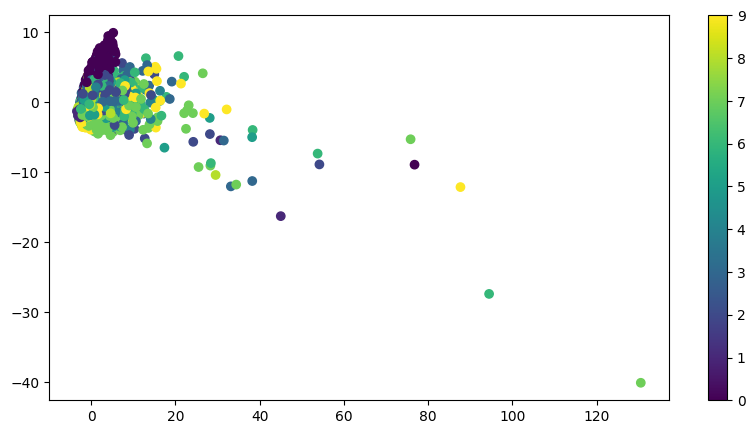

In [7]:
#Provide your code below
from sklearn.decomposition import PCA

# Get the hidden layer outputs
hidden_layer_outputs = get_untrained_hidden_layer_outputs()

# Apply PCA to visualize the results
pca = PCA(n_components=2)
pca_results = pca.fit_transform(hidden_layer_outputs)

# Create a scatter plot of the 2D PCA results
plt.figure(figsize=(10,5))
plt.scatter(pca_results[:,0], pca_results[:,1], c=y_test.astype(int), cmap='viridis')
plt.colorbar()
plt.show()

### **Part 1C**
#### In your own words, describe the difference between lower dimensional representations when using PCA vs t-SNE. Provide your response in the cell below.

 t-SNE had a much greater range in variability and range in the results. Since t-SNE is a non-linear method, it looks like it found many more relationships and resulted in more clusters that were especially easier to identify. I would consider it more successful in revealing clusters and complex relationships than PCA for lower dimensional representations. PCA in the lower dimensional representation led to overlapping clusters, which made it difficult to find distinctions. I could clearly see the linear influence of PCA. Both have issues of meshing classes together and overall just having clusters really close together.

### **Part 2A**
##### Extract the outputs from the hidden layer of a *trained* MLPClassifier and apply t-SNE to the hidden layer outputs to represent the data in 2D

1. get the outputs from `get_trained_hidden_layer_outputs()` and apply t-SNE to visualize the results
2. Create a scatter plot of the 2D t-SNE results
3. Color code the points based on their class labels (`y_test.astype(int)`)
4. Add a colorbar to identify different classes




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


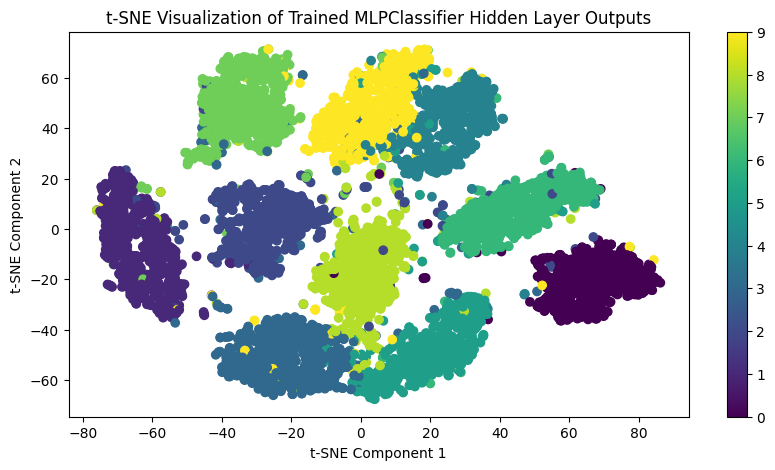

In [8]:
 # Provide your code here
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get the hidden layer outputs from the trained MLPClassifier
hidden_layer_outputs = get_trained_hidden_layer_outputs()

# Apply t-SNE to visualize the results
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(hidden_layer_outputs)

# Create a scatter plot of the 2D t-SNE results
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=y_test.astype(int), cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Trained MLPClassifier Hidden Layer Outputs')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### **Part 2B**
##### Extract the outputs from the hidden layer of an *trained* MLPClassifier and apply PCA to the hidden layer outputs to represent the data in 2D

1. get the outputs from `get_trained_hidden_layer_outputs()` and apply PCA to visualize the results
2. Create a scatter plot of the 2D PCA results
3. Color code the points based on their class labels (`y_test.astype(int)`)
4. Add a colorbar to identify different classes




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


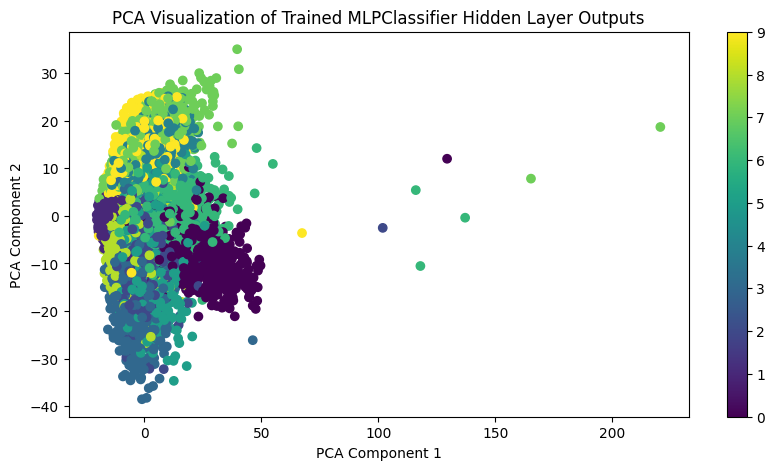

In [9]:
#Provide your code below

# Provide your code below
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get the hidden layer outputs from the trained MLPClassifier
hidden_layer_outputs = get_trained_hidden_layer_outputs()

# Apply PCA to visualize the results
pca = PCA(n_components=2)
pca_results = pca.fit_transform(hidden_layer_outputs)

# Create a scatter plot of the 2D PCA results
plt.figure(figsize=(10,5))
plt.scatter(pca_results[:,0], pca_results[:,1], c=y_test.astype(int), cmap='viridis')
plt.colorbar()
plt.title('PCA Visualization of Trained MLPClassifier Hidden Layer Outputs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


### **Part 2C**
##### In your own words, describe the difference between lower dimensional representations when using PCA vs t-SNE on the trained hidden layer outputs. Provide your response in the cell below.


When using PCA on the trained hidden layer outputs, the different classes are still really close together, but appear more distinct. There is still some overlap as well as data points that lie alone. When using t-SNE with trained hidden layer outputs, it appears to be very successful in identifying clusters that are clearly separate from each other. There are still some data points from different classes in the same cluster, but only for a few points. While nothing is perfectly separated and categorized, this appears to yield the best result.

### **Part 3**

1. How do the visualizations differ between the trained and untrained hidden layer outputs? What might account for these differences?
2. What differences do you observe between PCA and t-SNE? Why might certain patterns be more pronounced in one method compared to the other?
3. Why might certain clusters or patterns emerge only in the trained model?

Provide your response in the cell below.

When using PCA and t-SNE on the trained hidden layer outputs, I saw visual improvements in both methods. Because the model is trained, one can see that both PCA and t-SNE created more distinct clusters that are easier to identify and interpret. In the untrained hidden layer outputs visulizations, both results looked more "messy" and reveal the difficulty in finding relationships that is inevitable when using an untrained model.

PCA is a linear method, and all of the data clusters are always close together and even clash together. Meanwhile, in t-SNE, the clusters are more distinct and uniform. Patterns are more pronounced in t-SNE because its goal is to preserve local structures and relationships, while PCA focuses on maximizing variance along linear combinations of the orgiinal features, possibly missing intricate patterns that are found using t-SNE. For this data set, t-SNE was clearly preferable, showing that the method used and data used are incredibly influential in visualization.

Some clusters or patterns might only emerge in the trained model because there could be extremely hard-to-identify patterns that must be interpreted or emphasized by humans. Typically, untrained models have randomly initialized weights, and thus something that we can clearly identify as a pattern might not be highlighted by an untrained model. Additionally, while a trained model ideally knows what information and features to focus on (and therefore what noise to neglect), the untrained model could attempt to fit noise in with relevant features, and have a messier result.